In [43]:
%reset
# Importing Required Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [44]:
#Let's import our data:
#Store characterisitics
store_data = pd.read_csv('store.csv')
store_data.head(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [45]:
#Store sales data 
train_data = pd.read_csv('train.csv', low_memory=False)
train_data.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [46]:
#Now we will combine all of our data of the Store Column
combined_data = pd.merge(store_data,train_data,on='Store')
combined_data.head(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,5,2015-07-31,5263,555,1,1,0,1
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,4,2015-07-30,5020,546,1,1,0,1
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,3,2015-07-29,4782,523,1,1,0,1
3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2,2015-07-28,5011,560,1,1,0,1
4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1,2015-07-27,6102,612,1,1,0,1


In [47]:
combined_data.shape

(1017209, 18)

In [48]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   StoreType                  1017209 non-null  object 
 2   Assortment                 1017209 non-null  object 
 3   CompetitionDistance        1014567 non-null  float64
 4   CompetitionOpenSinceMonth  693861 non-null   float64
 5   CompetitionOpenSinceYear   693861 non-null   float64
 6   Promo2                     1017209 non-null  int64  
 7   Promo2SinceWeek            509178 non-null   float64
 8   Promo2SinceYear            509178 non-null   float64
 9   PromoInterval              509178 non-null   object 
 10  DayOfWeek                  1017209 non-null  int64  
 11  Date                       1017209 non-null  object 
 12  Sales                      1017209 non-null  int64  
 13  Customers   

#### We can see we have NaN value in the folowing columns:
CompetitionDistance        1014567 non-null  
4   CompetitionOpenSinceMonth  693861 non-null  
5   CompetitionOpenSinceYear   693861 non-null   
6   Promo2SinceWeek            509178 non-null   
8   Promo2SinceYear            509178 non-null   
9   PromoInterval              509178 non-null  
#### There are also non number columns that we will take care of later on



In [49]:
#Now we take a look at the unique values to see what is inside of our data frame
columns = list(combined_data.columns)
columns.remove('Date')
columns.remove('CompetitionDistance')

for column in columns:
    unique_values = combined_data[column].unique()
    print(f'Column {column}: {unique_values}')


Column Store: [   1    2    3 ... 1113 1114 1115]
Column StoreType: ['c' 'a' 'd' 'b']
Column Assortment: ['a' 'c' 'b']
Column CompetitionOpenSinceMonth: [ 9. 11. 12.  4. 10.  8. nan  3.  6.  5.  1.  2.  7.]
Column CompetitionOpenSinceYear: [2008. 2007. 2006. 2009. 2015. 2013. 2014. 2000. 2011.   nan 2010. 2005.
 1999. 2003. 2012. 2004. 2002. 1961. 1995. 2001. 1990. 1994. 1900. 1998.]
Column Promo2: [0 1]
Column Promo2SinceWeek: [nan 13. 14.  1. 45. 40. 26. 22.  5.  6. 10. 31. 37.  9. 39. 27. 18. 35.
 23. 48. 36. 50. 44. 49. 28.]
Column Promo2SinceYear: [  nan 2010. 2011. 2012. 2009. 2014. 2015. 2013.]
Column PromoInterval: [nan 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']
Column DayOfWeek: [5 4 3 2 1 7 6]
Column Sales: [ 5263  5020  4782 ... 20362 18841 21237]
Column Customers: [ 555  546  523 ... 3727 4022 4106]
Column Open: [1 0]
Column Promo: [1 0]
Column StateHoliday: ['0' 'a' 'b' 'c']
Column SchoolHoliday: [1 0]


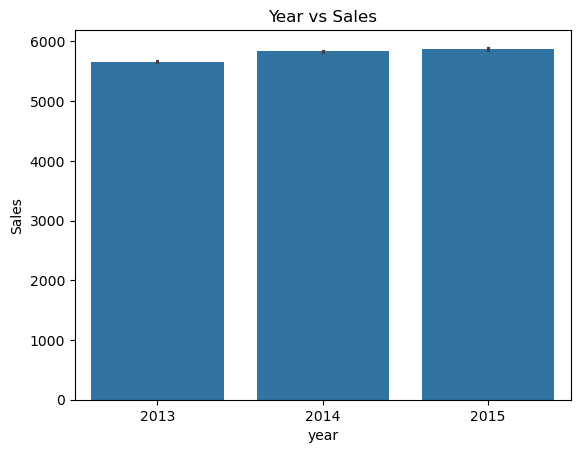

In [50]:
#Let's take care of our date columns
# extracting year and month from Date 
combined_data['year'] = combined_data['Date'].apply(lambda x : int(str(x)[0:4]))
combined_data['month'] = combined_data['Date'].apply(lambda x : int(str(x)[5:7]))

# Sales with respect to year 
sns.barplot(x='year', y='Sales', data=combined_data).set(title='Year vs Sales')
# sns.barplot(x='month',y='Sales', data=combined_data).set(title='Month vs Sales')

plt.show()

Note: Sales have beem increasing over the years

[Text(0.5, 1.0, 'Sales vs Day of Week')]

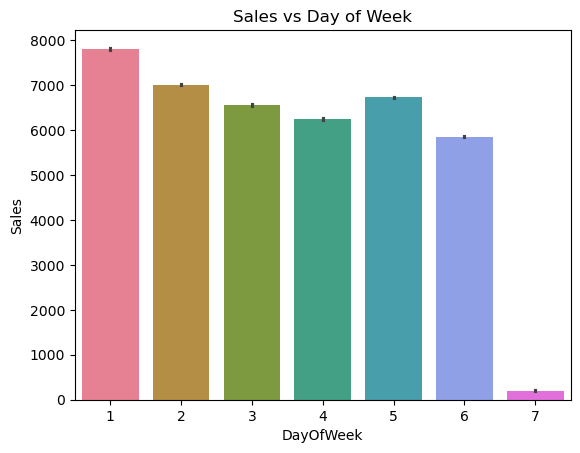

In [51]:
sns.barplot(x='DayOfWeek',y='Sales',data=combined_data,palette='husl').set(title='Sales vs Day of Week')

Note: Monday (1) is the day with highest sales, and on Sunday (7) most stores are closed, so that is why sales are so low

[Text(0.5, 1.0, 'Sales on Promo')]

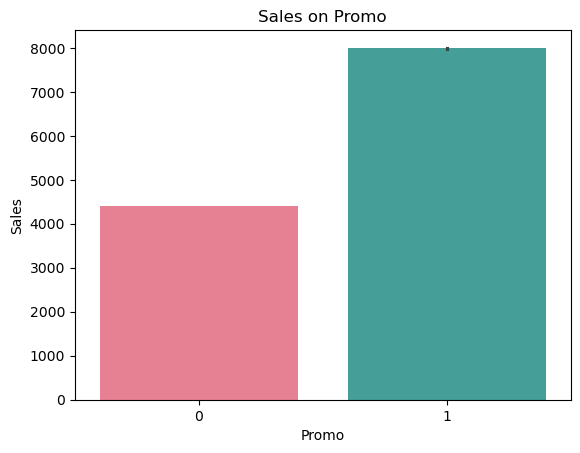

In [52]:
#Let's see how promos impact sales:
sns.barplot(x='Promo',y='Sales',data=combined_data,palette='husl').set(title='Sales on Promo')

Note: Sales almost double with Promo codes

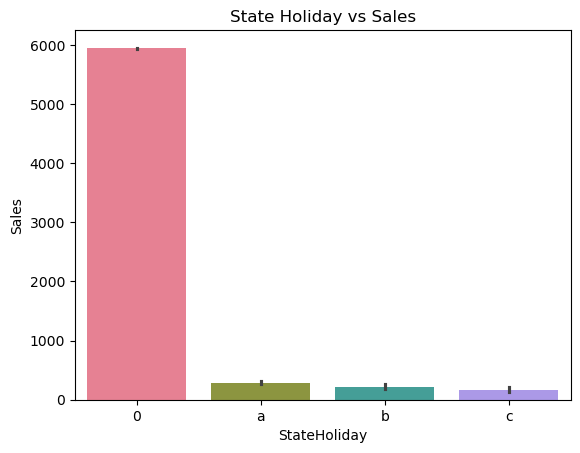

In [53]:
#Let's see the impact of holidays on our sales
# StateHoliday column has values 0 & "0", So, we need to change values with 0 to "0"
combined_data['StateHoliday'].loc[combined_data['StateHoliday'] == 0] = '0'

# Sales with respect to State Holiday
sns.barplot(x='StateHoliday', y='Sales', data=combined_data,palette='husl').set(title='State Holiday vs Sales')
plt.show()

Note: Only a few stores are open during State Holidays that's why we can see that there are way less sales in a,b,c where:
a = Public Holiday, 
b = Easter Holiday, 
c = Chirstmas, 
0 = Not a Holiday, Working day

[Text(0.5, 1.0, 'School Holiday vs Sales')]

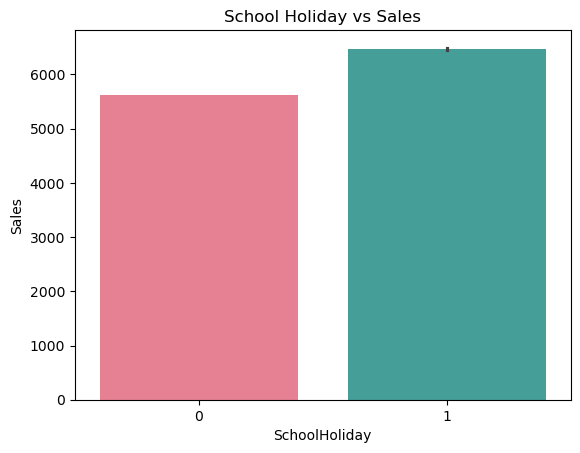

In [54]:
#School Holiday influence on Sales
sns.barplot(x='SchoolHoliday', y='Sales', data=combined_data,palette='husl').set(title='School Holiday vs Sales')

Note: We can see that on School Holidays there are indeed more sales

[Text(0.5, 1.0, 'StoreType vs Sales')]

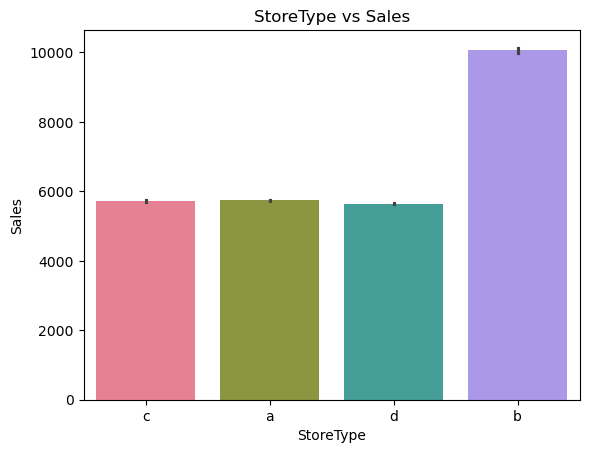

In [55]:
#Let's see how stores sales are affected by their type and by their assortment
# Sales vs Storetype
sns.barplot(x='StoreType', y='Sales', data=combined_data,palette='husl').set(title='StoreType vs Sales')

Note: We can see that stores with type b have the highest sales

[Text(0.5, 1.0, 'Assortment vs Sales')]

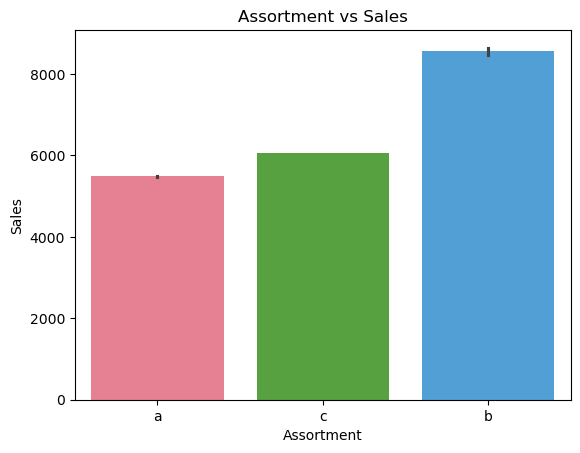

In [56]:
# Sales vs Assortment
sns.barplot(x='Assortment', y='Sales', data=combined_data,palette='husl').set(title='Assortment vs Sales')

Note: Regarding assortment, stores with assortment b nave the highest sales

### Handling Missing Values¶
Few columns have high number of missing values, so we need to fill them with appropriate method for better result.

#### Approach
1: The null values in Column Promo2SinceWeek, Promo2SinceYear, PromoInterval is due to Promo2 is 0 for those stores. So we would fill all the null values in these columns with 0.

2: Since Competition Distance for 3 stores isn't given we will remove these lines

3: CompetitionOpenSinceMonth, CompetitionOpenSinceYear can be filled using the most occuring values in each column but this will not be a real life representation so we will drop them.


In [57]:
# Filling Promo2SinceWeek, Promo2SinceYear, PromoInterval with 0
store_data.update(store_data['Promo2SinceWeek'].fillna(value=0,inplace=True))
store_data.update(store_data['Promo2SinceYear'].fillna(value=0,inplace=True))
store_data.update(store_data['PromoInterval'].fillna(value=0,inplace=True))

In [58]:
#no_competition_dates=store_data[store_data['CompetitionOpenSinceMonth'].isna()]
#Dropping lines with NaN
store_data_cleaned = store_data.dropna(subset=['CompetitionOpenSinceMonth','CompetitionOpenSinceYear','CompetitionDistance'])


In [59]:
#Just checking if the cleanup was correct
nan_rows = store_data_cleaned[store_data_cleaned['CompetitionOpenSinceMonth'].isna()]

nan_rows

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval


In [60]:
store_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 761 entries, 0 to 1111
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      761 non-null    int64  
 1   StoreType                  761 non-null    object 
 2   Assortment                 761 non-null    object 
 3   CompetitionDistance        761 non-null    float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     761 non-null    int64  
 7   Promo2SinceWeek            761 non-null    float64
 8   Promo2SinceYear            761 non-null    float64
 9   PromoInterval              761 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 65.4+ KB


In [61]:
combined_data = pd.merge(store_data_cleaned,train_data,on='Store')
print(combined_data.shape)
combined_data.head(5)
combined_data.info()



(693861, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693861 entries, 0 to 693860
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      693861 non-null  int64  
 1   StoreType                  693861 non-null  object 
 2   Assortment                 693861 non-null  object 
 3   CompetitionDistance        693861 non-null  float64
 4   CompetitionOpenSinceMonth  693861 non-null  float64
 5   CompetitionOpenSinceYear   693861 non-null  float64
 6   Promo2                     693861 non-null  int64  
 7   Promo2SinceWeek            693861 non-null  float64
 8   Promo2SinceYear            693861 non-null  float64
 9   PromoInterval              693861 non-null  object 
 10  DayOfWeek                  693861 non-null  int64  
 11  Date                       693861 non-null  object 
 12  Sales                      693861 non-null  int64  
 13  Customers       

In [62]:
combined_data['StateHoliday'].unique()

array(['0', 'a', 'b', 'c'], dtype=object)

In [63]:
combined_data['StateHoliday'].loc[combined_data['StateHoliday'] == 0] = '0'

In [64]:
combined_data['StateHoliday'].head()

0    0
1    0
2    0
3    0
4    0
Name: StateHoliday, dtype: object

In [65]:
combined_data['PromoInterval'].loc[combined_data['PromoInterval'] == 0] = '0'

In [66]:
combined_data['PromoInterval'].head()

0    0
1    0
2    0
3    0
4    0
Name: PromoInterval, dtype: object

In [67]:
# encoding all categorical varibale to numeric values
from sklearn.preprocessing import LabelEncoder

combined_data_og = combined_data

label_encoder = LabelEncoder()

combined_data['StoreType'] = label_encoder.fit_transform(combined_data['StoreType'])
combined_data['Assortment'] = label_encoder.fit_transform(combined_data['Assortment'])
combined_data['StateHoliday'] = label_encoder.fit_transform(combined_data['StateHoliday'])
combined_data['PromoInterval'] = label_encoder.fit_transform(combined_data['PromoInterval'])

combined_data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,5,2015-07-31,5263,555,1,1,0,1
1,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,4,2015-07-30,5020,546,1,1,0,1
2,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,3,2015-07-29,4782,523,1,1,0,1
3,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,2,2015-07-28,5011,560,1,1,0,1
4,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,1,2015-07-27,6102,612,1,1,0,1


In [68]:
#We almosto forgot to separate our dates into something usable
combined_data['Year'] = combined_data['Date'].apply(lambda x: int(str(x)[0:4]))
combined_data['Month'] = combined_data['Date'].apply(lambda x: int(str(x)[5:7]))
combined_data.drop(['Date'],axis=1,inplace=True)

combined_data.head(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month
0,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,5,5263,555,1,1,0,1,2015,7
1,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,4,5020,546,1,1,0,1,2015,7
2,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,3,4782,523,1,1,0,1,2015,7
3,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,2,5011,560,1,1,0,1,2015,7
4,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,1,6102,612,1,1,0,1,2015,7


In [69]:
# Correlation
correlation = combined_data.corr()
#correlation

<Axes: >

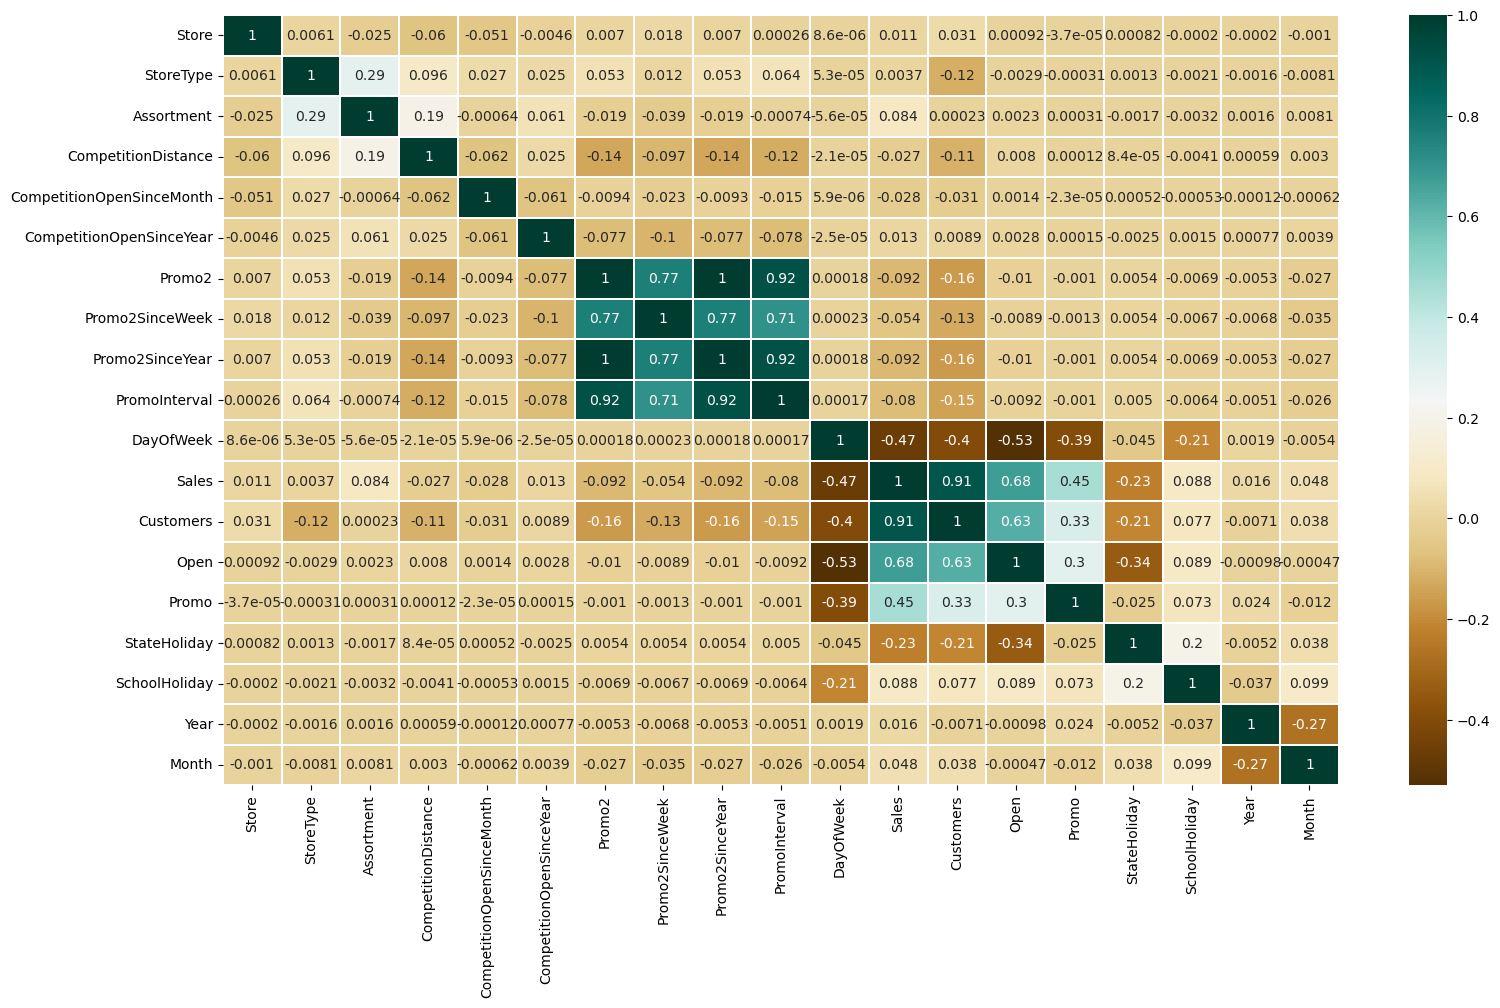

In [70]:
# Heat Map
plt.figure(figsize=(18,10))
sns.heatmap(correlation, annot=True, linewidths=0.2, cmap='BrBG')

Note: We can see High correlation between Customers, Open and Promo

#### Handling Closed Stores in Predictions
There are a few reasons why predictions for closed stores are handled separately:

Zero Sales During Closure:
If a store is closed, the sales are naturally zero. Including these zero sales periods in the model can introduce noise and potentially skew the model's learning process.

Model Simplification:
By handling closed stores separately, the model can focus on learning the patterns and relationships in the data when the store is open and operational, which is more complex and varied than the closed periods where sales are simply zero.

In [71]:
#combined_data['IsClosed'] = combined_data['Open'].apply(lambda x: 1 if x == 0 else 0)

In [72]:
#Drop all where store is closed -> Change to instead of drop If store is closed sales should be 0
df_cleaned = combined_data.loc[combined_data['Open'] != 0]
#combined_data = df_cleaned

In [73]:
df_cleaned.info() ##HERE

<class 'pandas.core.frame.DataFrame'>
Index: 575773 entries, 0 to 693859
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      575773 non-null  int64  
 1   StoreType                  575773 non-null  int32  
 2   Assortment                 575773 non-null  int32  
 3   CompetitionDistance        575773 non-null  float64
 4   CompetitionOpenSinceMonth  575773 non-null  float64
 5   CompetitionOpenSinceYear   575773 non-null  float64
 6   Promo2                     575773 non-null  int64  
 7   Promo2SinceWeek            575773 non-null  float64
 8   Promo2SinceYear            575773 non-null  float64
 9   PromoInterval              575773 non-null  int32  
 10  DayOfWeek                  575773 non-null  int64  
 11  Sales                      575773 non-null  int64  
 12  Customers                  575773 non-null  int64  
 13  Open                       575773 

In [74]:
from sklearn.preprocessing import StandardScaler
#Now as good practice we will standardize all numerical columns, except, 
#categorical(we have none of those now because we previously transformed them) and flag columns(binary columns)
df=df_cleaned.copy()

# Function to identify binary columns (0/1)
def is_binary(col):
    return sorted(df[col].unique()) == [0, 1]

# Select numerical columns excluding binary columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
numerical_columns_to_scale = [col for col in numerical_columns if not is_binary(col)]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical columns excluding binary columns
df[numerical_columns_to_scale] = scaler.fit_transform(df[numerical_columns_to_scale])

# Display the scaled DataFrame
df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month
0,-1.722912,2,0,-0.527979,0.552973,-0.116718,0,-0.714975,-0.932539,0,0.860049,-0.543195,-0.535048,0.0,1,0,1,1.50246,0.347876
1,-1.722912,2,0,-0.527979,0.552973,-0.116718,0,-0.714975,-0.932539,0,0.279397,-0.620679,-0.558179,0.0,1,0,1,1.50246,0.347876
2,-1.722912,2,0,-0.527979,0.552973,-0.116718,0,-0.714975,-0.932539,0,-0.301254,-0.696568,-0.617294,0.0,1,0,1,1.50246,0.347876
3,-1.722912,2,0,-0.527979,0.552973,-0.116718,0,-0.714975,-0.932539,0,-0.881906,-0.623548,-0.522197,0.0,1,0,1,1.50246,0.347876
4,-1.722912,2,0,-0.527979,0.552973,-0.116718,0,-0.714975,-0.932539,0,-1.462557,-0.275668,-0.388546,0.0,1,0,1,1.50246,0.347876


In [75]:
df_sample = df.sample(frac=0.1, random_state=42)

In [76]:
df_sample.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month
273926,-0.339959,0,2,-0.497611,0.552973,0.719676,0,-0.714975,-0.932539,0,-0.301254,-0.797967,-0.473363,0.0,0,0,0,0.21627,-1.457672
329811,-0.042283,2,0,-0.552019,1.487511,0.552397,0,-0.714975,-0.932539,0,-1.462557,-1.650291,-1.519436,0.0,0,0,0,1.50246,0.046952
167041,-0.891900,0,2,-0.681081,-0.381565,1.054233,0,-0.714975,-0.932539,0,-0.301254,0.767337,0.796318,0.0,1,0,1,0.21627,0.648801
241347,-0.541511,2,2,2.617572,1.175999,-1.120391,0,-0.714975,-0.932539,0,0.279397,2.743976,0.660098,0.0,1,0,0,0.21627,1.852500
314139,-0.119803,3,2,-0.267325,-1.316104,1.054233,1,0.188062,1.070492,2,1.440701,-0.114641,-0.493924,0.0,0,0,0,-1.06992,1.852500


In [77]:
isinstance(df_sample, pd.DataFrame)

True

In [78]:
X = df_sample.drop(columns=['Sales'])
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57577 entries, 273926 to 9261
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      57577 non-null  float64
 1   StoreType                  57577 non-null  int32  
 2   Assortment                 57577 non-null  int32  
 3   CompetitionDistance        57577 non-null  float64
 4   CompetitionOpenSinceMonth  57577 non-null  float64
 5   CompetitionOpenSinceYear   57577 non-null  float64
 6   Promo2                     57577 non-null  int64  
 7   Promo2SinceWeek            57577 non-null  float64
 8   Promo2SinceYear            57577 non-null  float64
 9   PromoInterval              57577 non-null  int32  
 10  DayOfWeek                  57577 non-null  float64
 11  Customers                  57577 non-null  float64
 12  Open                       57577 non-null  float64
 13  Promo                      57577 non-null  int6

In [79]:
y = df_sample['Sales']
y.info()

<class 'pandas.core.series.Series'>
Index: 57577 entries, 273926 to 9261
Series name: Sales
Non-Null Count  Dtype  
--------------  -----  
57577 non-null  float64
dtypes: float64(1)
memory usage: 899.6 KB


In [80]:
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Support Vector Regressor": SVR()
}

# List to store results
results_list = []

# Function to train, predict, and evaluate a model
def evaluate_model(model_name, model):
    start_time = time.time()
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Print the results for the current model
    print(f"Results for {model_name}:")
    print(f"  MSE: {mse}")
    print(f"  RMSE: {rmse}")
    print(f"  MAE: {mae}")
    print(f"  R2: {r2}")
    print(f"  Time (s): {elapsed_time}\n")
    
    # Return the results as a dictionary
    return {
        "Model": model_name,
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mae,
        "R2": r2,
        "Time (s)": elapsed_time
    }

# Evaluate each model separately
for model_name, model in models.items():
    results = evaluate_model(model_name, model)
    results_list.append(results)

# Convert the list of results to a DataFrame
results_df = pd.DataFrame(results_list)

# Display all results together
print("All results:")
print(results_df)

Results for Linear Regression:
  MSE: 0.20625011814285096
  RMSE: 0.45414768318560317
  MAE: 0.31406538708977705
  R2: 0.7850560275412181
  Time (s): 0.01590561866760254

Results for Random Forest Regressor:
  MSE: 0.04007271955933362
  RMSE: 0.2001817163462578
  MAE: 0.13662242750105963
  R2: 0.9582381352948163
  Time (s): 33.24911427497864

Results for Gradient Boosting Regressor:
  MSE: 0.10496521124293091
  RMSE: 0.323983350255736
  MAE: 0.23788018079699005
  R2: 0.8906102955106947
  Time (s): 3.4845783710479736

Results for Support Vector Regressor:
  MSE: 0.07561309627854447
  RMSE: 0.27497835601833187
  MAE: 0.19160521082991352
  R2: 0.9211996607305603
  Time (s): 100.55505228042603

All results:
                         Model       MSE      RMSE       MAE        R2  \
0            Linear Regression  0.206250  0.454148  0.314065  0.785056   
1      Random Forest Regressor  0.040073  0.200182  0.136622  0.958238   
2  Gradient Boosting Regressor  0.104965  0.323983  0.237880  0.8

In [81]:
#We'll use GridSearchCV to find the best combination of hyperparameters
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the model
model = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best R2 Score: {best_score}")

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best R2 Score: 0.947004051493536


Best Parameters: {'max_depth': 30, 
                  'min_samples_leaf': 1, 
                  'min_samples_split': 2, 
                  'n_estimators': 300}
Best R2 Score: 0.947004051493536

In [82]:
### TRY XGBOOST
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Train the XGBoost model
model = XGBRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate mean squared error
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Calculate R-squared
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print the mean squared error and R-squared
print(f"Train Mean Squared Error: {train_mse}")
print(f"Test Mean Squared Error: {test_mse}")
print(f"Train R-squared: {train_r2}")
print(f"Test R-squared: {test_r2}")



Train Mean Squared Error: 0.022405328246936435
Test Mean Squared Error: 0.02942571794007146
Train R-squared: 0.9778945982255234
Test R-squared: 0.9693339292920553


In [83]:
# Define hyperparameter grid
n_estimators_options = [50, 100, 200]
max_depth_options = [3, 5, 7]
learning_rate_options = [0.01, 0.1, 0.2]

# Initialize a list to store results
results = []

# Function to train and evaluate model
def train_and_evaluate(n_estimators, max_depth, learning_rate):
    model = XGBRegressor(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, random_state=42)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    results.append({
        'n_estimators': n_estimators,
        'max_depth': max_depth,
        'learning_rate': learning_rate,
        'train_mse': train_mse,
        'test_mse': test_mse,
        'train_r2': train_r2,
        'test_r2': test_r2
    })

# Iterate over all combinations of hyperparameters
for n_estimators in n_estimators_options:
    for max_depth in max_depth_options:
        for learning_rate in learning_rate_options:
            train_and_evaluate(n_estimators, max_depth, learning_rate)

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Print results in table format
print(results_df)

# Find the hyperparameters with the highest test R-squared value
best_result = results_df.loc[results_df['test_r2'].idxmax()]

print("\nBest Hyperparameters:")
print(f"n_estimators: {best_result['n_estimators']}")
print(f"max_depth: {best_result['max_depth']}")
print(f"learning_rate: {best_result['learning_rate']}")
print(f"Test R-squared: {best_result['test_r2']}")

    n_estimators  max_depth  learning_rate  train_mse  test_mse  train_r2  \
0             50          3           0.01   0.542978  0.511442  0.464291   
1             50          3           0.10   0.134108  0.127335  0.867687   
2             50          3           0.20   0.109699  0.105918  0.891769   
3             50          5           0.01   0.486761  0.457352  0.519755   
4             50          5           0.10   0.086586  0.086525  0.914573   
5             50          5           0.20   0.063552  0.066077  0.937299   
6             50          7           0.01   0.458560  0.431274  0.547578   
7             50          7           0.10   0.056154  0.062155  0.944597   
8             50          7           0.20   0.035941  0.043899  0.964541   
9            100          3           0.01   0.346884  0.325133  0.657760   
10           100          3           0.10   0.106704  0.102911  0.894725   
11           100          3           0.20   0.086109  0.084876  0.915043   

In [84]:
# getting weights of all the features used in the data
feature_importance = model.feature_importances_
feature_importance

array([0.02362167, 0.134179  , 0.04271248, 0.04506046, 0.01954051,
       0.02142471, 0.0481455 , 0.03684359, 0.01637655, 0.0296835 ,
       0.01832044, 0.43144256, 0.        , 0.08960915, 0.01713926,
       0.0048242 , 0.00839925, 0.01267722], dtype=float32)

In [85]:
# features used
columns = list(X_train.columns)
columns

['Store',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'PromoInterval',
 'DayOfWeek',
 'Customers',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'Year',
 'Month']

In [86]:
# Lets make a dataframe consists of features and values
feature_importance_df = pd.DataFrame({'Features':columns, 'Values':feature_importance})
feature_importance_df

,Features,Values
0,Store,0.023622
1,StoreType,0.134179
2,Assortment,0.042712
3,CompetitionDistance,0.045060
4,CompetitionOpenSinceMonth,0.019541
5,CompetitionOpenSinceYear,0.021425
6,Promo2,0.048146
7,Promo2SinceWeek,0.036844
8,Promo2SinceYear,0.016377
9,PromoInterval,0.029684


In [87]:
feature_importance_df.sort_values(by=["Values"], inplace=True, ascending=False)
feature_importance_df

,Features,Values
11,Customers,0.431443
1,StoreType,0.134179
13,Promo,0.089609
6,Promo2,0.048146
3,CompetitionDistance,0.045060
2,Assortment,0.042712
7,Promo2SinceWeek,0.036844
9,PromoInterval,0.029684
0,Store,0.023622
5,CompetitionOpenSinceYear,0.021425


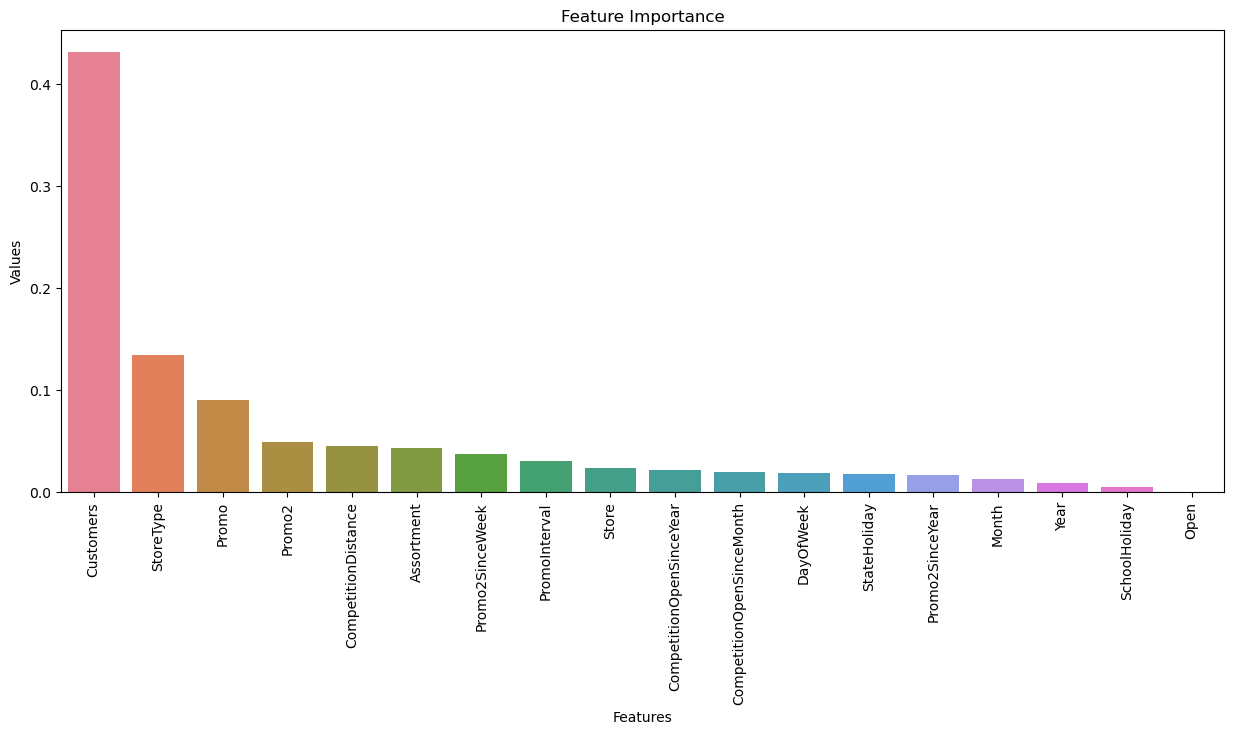

In [88]:
# Feature Importance
plt.figure(figsize=(15,6))

sns.barplot(x=feature_importance_df['Features'], y=feature_importance_df['Values'],
            data = feature_importance_df,palette='husl').set(title='Feature Importance')

plt.xticks(rotation=90)
plt.show()

In [89]:
#pip install tensorflow

In [90]:
#pip show tensorflow

In [91]:
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
def build_model(input_shape):
    model = Sequential()
    model.add(Dense(64, input_dim=input_shape, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1))  # Output layer for regression
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

input_shape = X_train.shape[1]
model = build_model(input_shape)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train Mean Squared Error: {train_mse}")
print(f"Test Mean Squared Error: {test_mse}")
print(f"Train R-squared: {train_r2}")
print(f"Test R-squared: {test_r2}")

Epoch 1/100
1152/1152 ━━━━━━━━━━━━━━━━━━━━ 2s 755us/step - loss: 0.3264 - mae: 0.3964 - val_loss: 0.1493 - val_mae: 0.2739
Epoch 2/100
1152/1152 ━━━━━━━━━━━━━━━━━━━━ 1s 665us/step - loss: 0.1423 - mae: 0.2696 - val_loss: 0.1250 - val_mae: 0.2575
Epoch 3/100
1152/1152 ━━━━━━━━━━━━━━━━━━━━ 1s 669us/step - loss: 0.1234 - mae: 0.2499 - val_loss: 0.1072 - val_mae: 0.2402
Epoch 4/100
1152/1152 ━━━━━━━━━━━━━━━━━━━━ 1s 661us/step - loss: 0.0996 - mae: 0.2328 - val_loss: 0.0922 - val_mae: 0.2235
Epoch 5/100
1152/1152 ━━━━━━━━━━━━━━━━━━━━ 1s 660us/step - loss: 0.0902 - mae: 0.2224 - val_loss: 0.0858 - val_mae: 0.2141
Epoch 6/100
1152/1152 ━━━━━━━━━━━━━━━━━━━━ 1s 653us/step - loss: 0.0820 - mae: 0.2134 - val_loss: 0.0808 - val_mae: 0.2095
Epoch 7/100
1152/1152 ━━━━━━━━━━━━━━━━━━━━ 1s 662us/step - loss: 0.0742 - mae: 0.2036 - val_loss: 0.0753 - val_mae: 0.2026
Epoch 8/100
1152/1152 ━━━━━━━━━━━━━━━━━━━━ 1s 649us/step - loss: 0.0756 - mae: 0.2001 - val_loss: 0.0717 - val_mae: 0.1971
Epoch 9/100
1152